Extract features from EmoDB dataset

In [1]:
import librosa
import os
import numpy as np
import pandas as pd

# Import metadatas

In [2]:
sr = 16000

In [3]:
#ravdess = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/ravdess/processed_metadata.csv")
#emovo = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emovo/processed_metadata.csv")
#emodb = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emodb/processed_metadata.csv")

ravdess = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/ravdess/processed_metadata.csv")
emovo = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emovo/processed_metadata.csv")
emodb = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emodb/processed_metadata.csv")

In [4]:
emodb

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,angry,3,m,1.877823
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819
...,...,...,...,...,...,...
530,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Lb.wav,bored,16,f,3.442721
531,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Tb.wav,sad,16,f,3.500635
532,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Td.wav,sad,16,f,3.934195
533,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,angry,16,f,2.414150


In [5]:
ravdess

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-01-01-01.wav,neutral,Actor_01,m,3.303311
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-01-02-01.wav,neutral,Actor_01,m,3.336689
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-02-01-01.wav,neutral,Actor_01,m,3.269932
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-02-02-01.wav,neutral,Actor_01,m,3.169841
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,calm,Actor_01,m,3.536871
...,...,...,...,...,...,...
1435,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-01-02-02-24.wav,surprised,Actor_24,f,3.403401
1436,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-01-24.wav,surprised,Actor_24,f,3.937279
1437,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-02-24.wav,surprised,Actor_24,f,3.970658
1438,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-01-24.wav,surprised,Actor_24,f,3.670340


In [6]:
emovo

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b1.wav,disgust,f1,f,2.858685
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b2.wav,disgust,f1,f,2.858685
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b3.wav,disgust,f1,f,2.389342
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-d1.wav,disgust,f1,f,1.992018
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-d2.wav,disgust,f1,f,2.782676
...,...,...,...,...,...,...
583,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n1.wav,sad,m3,m,1.877370
584,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n2.wav,sad,m3,m,3.114694
585,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n3.wav,sad,m3,m,2.474694
586,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n4.wav,sad,m3,m,4.906667


In [7]:
frames = {'emodb': emodb, 'emovo': emovo, 'ravdess': ravdess}

result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,angry,3,m,1.877823
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819
...,...,...,...,...,...,...
1435,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-01-02-02-24.wav,surprised,Actor_24,f,3.403401
1436,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-01-24.wav,surprised,Actor_24,f,3.937279
1437,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-02-24.wav,surprised,Actor_24,f,3.970658
1438,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-01-24.wav,surprised,Actor_24,f,3.670340


# Remove labels

Remove the labels to obtain the same number in all datasets by dropping problematic labels and the most correlated of the rest

For emodb, remove class disgust that have serious imbalance and the most correlated which is ...

In [8]:
frames['emodb'] = frames['emodb'].drop(frames['emodb'][frames['emodb'].label == 'disgust'].index)
frames['emodb'] = frames['emodb'].drop(frames['emodb'][frames['emodb'].label == 'bored'].index)

In [9]:
frames['emodb'].label.unique()

array(['happy', 'neutral', 'angry', 'sad', 'fear'], dtype=object)

For emovo, remove the most correlated labes which are ...

In [10]:
frames['emovo'] = frames['emovo'].drop(frames['emovo'][frames['emovo'].label == 'neutral'].index)
frames['emovo'] = frames['emovo'].drop(frames['emovo'][frames['emovo'].label == 'disgust'].index)

In [11]:
frames['emovo'].label.unique()

array(['happy', 'fear', 'angry', 'surprised', 'sad'], dtype=object)

For ravdess, remove class neutral neutral which have half of the samples and the 2 most correlated which are ...

In [12]:
frames['ravdess'] = frames['ravdess'].drop(frames['ravdess'][frames['ravdess'].label == 'neutral'].index)
frames['ravdess'] = frames['ravdess'].drop(frames['ravdess'][frames['ravdess'].label == 'happy'].index)
frames['ravdess'] = frames['ravdess'].drop(frames['ravdess'][frames['ravdess'].label == 'fear'].index)

In [13]:
frames['ravdess'].label.unique()

array(['calm', 'sad', 'angry', 'disgust', 'surprised'], dtype=object)

# Balance datasets

<AxesSubplot: >

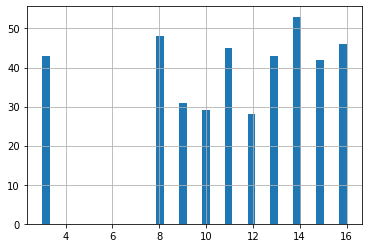

In [14]:
frames['emodb']['actor'].hist(bins=40)

<AxesSubplot: >

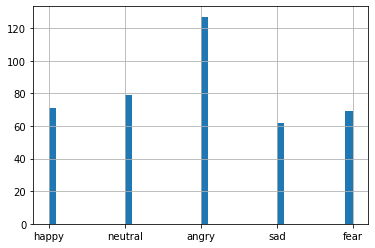

In [15]:
frames['emodb']['label'].hist(bins=40)

Undersample angry class to 80 sample

<AxesSubplot: >

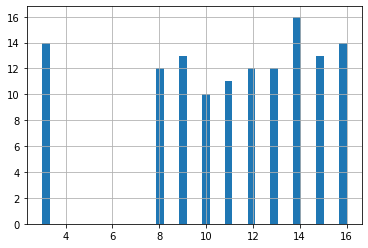

In [16]:
frames['emodb'][frames['emodb'].label == 'angry']['actor'].hist(bins=40)

Keep only 8 samples for each actor

In [17]:
actors_emodb = frames['emodb'].actor.unique()
for a in actors_emodb:
    cond = (frames['emodb'].actor == a) & (frames['emodb'].label == 'angry')
    ext = frames['emodb'][cond].sample(n=8, random_state=1997).index
    to_drop = np.setdiff1d(frames['emodb'][cond].index, ext, assume_unique=True)
    
    frames['emodb'].drop(index=to_drop, inplace=True)

<AxesSubplot: >

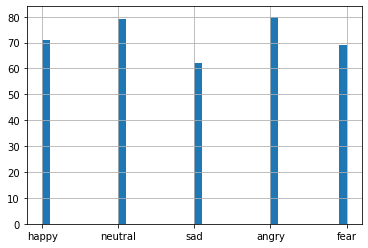

In [18]:
frames['emodb']['label'].hist(bins=40)

<AxesSubplot: >

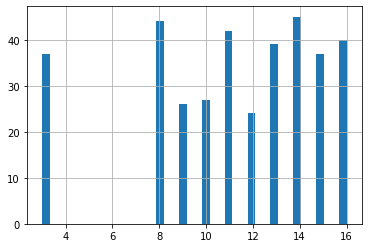

In [19]:
frames['emodb']['actor'].hist(bins=40)

<AxesSubplot: >

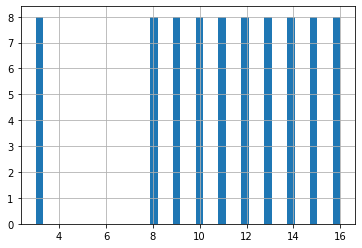

In [20]:
frames['emodb'][frames['emodb'].label == 'angry']['actor'].hist(bins=40)

<AxesSubplot: >

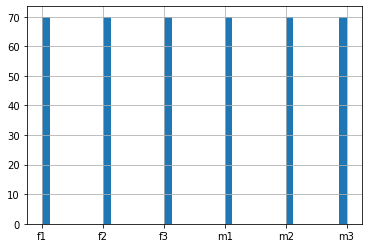

In [21]:
frames['emovo']['actor'].hist(bins=40)

<AxesSubplot: >

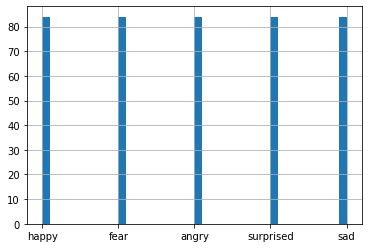

In [22]:
frames['emovo']['label'].hist(bins=40)

<AxesSubplot: >

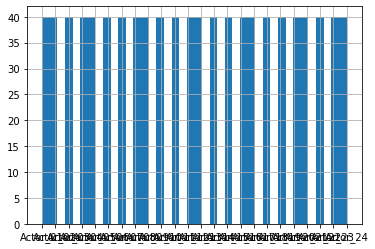

In [23]:
frames['ravdess']['actor'].hist(bins=40)

<AxesSubplot: >

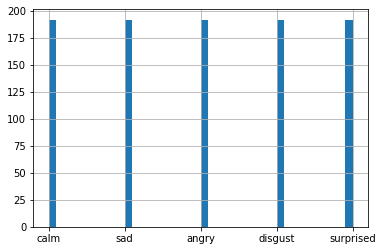

In [24]:
frames['ravdess']['label'].hist(bins=40)

In [25]:
for d in frames:
    frames[d].reset_index(inplace=True)

In [26]:
frames['emodb']

,index,path,filename,label,actor,gender,length
0,0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277
1,1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293
2,3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259
3,4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819
4,5,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Ta.wav,sad,3,m,1.735692
...,...,...,...,...,...,...,...
356,527,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Aa.wav,fear,16,f,2.582721
357,529,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Fb.wav,happy,16,f,2.583537
358,531,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Tb.wav,sad,16,f,3.500635
359,532,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Td.wav,sad,16,f,3.934195


# Load and trim the samples for each dataset

In [27]:
def load_samples(metadata):
    samples = []
    for _, data in metadata.iterrows():
        # load audio data
        path = data["path"]
        sample, _ = librosa.load(path, sr=sr)
        trimmed = librosa.effects.trim(sample, top_db=30, frame_length=512, hop_length=64)[0]
        samples.append(trimmed)
    return samples

In [28]:
dataset_samples = {}
for dataset in frames:
    print(f'Processing {dataset}')
    dataset_samples[dataset] = load_samples(frames[dataset])

Processing emodb
Processing emovo
Processing ravdess


In [29]:
len(dataset_samples['emodb']), len(frames['emodb']), len(dataset_samples['emovo']), len(frames['emovo']), len(dataset_samples['ravdess']), len(frames['ravdess'])

(361, 361, 420, 420, 960, 960)

Update metadata with new lengths

In [30]:
for d in dataset_samples:
    trimmed_length = [len(s)/sr for s in dataset_samples[d]]
    frames[d]['trimmed_lenght'] = trimmed_length

In [31]:
result = pd.concat(frames.values())
result

,index,path,filename,label,actor,gender,length,trimmed_lenght
0,0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277,1.656
1,1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293,1.328
2,3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259,1.792
3,4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819,1.220
4,5,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Ta.wav,sad,3,m,1.735692,1.548
...,...,...,...,...,...,...,...,...
955,1435,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-01-02-02-24.wav,surprised,Actor_24,f,3.403401,1.388
956,1436,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-01-24.wav,surprised,Actor_24,f,3.937279,1.924
957,1437,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-02-24.wav,surprised,Actor_24,f,3.970658,1.928
958,1438,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-01-24.wav,surprised,Actor_24,f,3.670340,1.948


# Split and repeat

Let's keep a sample length equal to 3 seconds, repeat the shorter while split the longer segments. Throw away samples below min lenght

In [32]:
target_l = 3
buffer_length = target_l*sr
target_l, buffer_length

(3, 48000)

In [33]:
min_l = result["trimmed_lenght"].describe()["min"]
min_s = result.loc[result['trimmed_lenght'] == min_l]
min_s

,index,path,filename,label,actor,gender,length,trimmed_lenght
228,340,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,pau-m1-d2.wav,fear,m1,m,1.92,0.9


In [34]:
import math 
def repeat_sample(data, length):
    n = math.ceil(length/len(data))
    data = np.tile(data, n)
    return data[:int(length)]

In [35]:
def split_sample(audio, length, minimum):
    samples_total = len(audio)
    samples_wrote = 0
    segments = []
    
    to_process = samples_total - samples_wrote
    while to_process > minimum:
        segment = audio[samples_wrote : (samples_wrote + length)]
        segments.append(segment)
        samples_wrote += length
        to_process = samples_total - samples_wrote
    return segments

# Data augmentation

We have not so much samples, augment the datasets' records

In [36]:
def time_stretch_sample(sample, factors):
    stretched = []
    for f in factors:
        stretched.append(librosa.effects.time_stretch(y=sample, rate=f))
    return stretched

def pitch_shift_sample(sample, factors, sr):
    stretched = []
    for f in factors:
        stretched.append(librosa.effects.pitch_shift(y=sample, sr=sr, n_steps=f))
    return stretched

time_factors = [0.75, 0.9, 1.1, 1.25]
pitch_factors = [-3, -1.5, +1.5, +3]

In [37]:
import IPython
example = dataset_samples['emovo'][100]
IPython.display.Audio(example, rate=sr)

In [38]:
s = time_stretch_sample(example, time_factors)
IPython.display.Audio(s[0], rate=sr)

In [39]:
s = pitch_shift_sample(example, pitch_factors, sr)
IPython.display.Audio(s[3], rate=sr)

# Dataset processing

Split and repeat all the samples to the same length, then extract log Mel-specotrograms from all the samples

In [40]:
result.head()

,index,path,filename,label,actor,gender,length,trimmed_lenght
0,0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277,1.656
1,1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293,1.328
2,3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259,1.792
3,4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819,1.220
4,5,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Ta.wav,sad,3,m,1.735692,1.548


In [41]:
from tqdm.notebook import tqdm

def process_audio_files(audio_data, metadata):
    sgram_list = []
    audio_list = []
    mod_data = []
    for idx, data in tqdm(metadata.iterrows(), total=metadata.shape[0]):
        # load audio data
        sample = audio_data[idx]
        
        # data augmentation
        pitched = [(s,1) for s in pitch_shift_sample(sample, pitch_factors, sr)]
        stretched = [(s,2) for s in time_stretch_sample(sample, time_factors)]
        list_sample = [(sample, 0)] + pitched + stretched
        
        splitted_list = []
        # split the larger segmtents
        for s in list_sample:
            if len(s[0]) >= buffer_length:
                splitted = split_sample(s[0], int(buffer_length), int(min_l))
                # trim silent parts in each splitted frame
                samples = [(librosa.effects.trim(splitted_sample, top_db=30, frame_length=512, hop_length=64)[0], num, s[1])
                           for num, splitted_sample in enumerate(splitted)]
                splitted_list += samples
            else:
                splitted_list.append((s[0], 0, s[1]))
           
        # repeat the shorter segments
        for sample in splitted_list:
            s = sample[0]
            if len(s) < buffer_length:
                s = repeat_sample(s, buffer_length)
            
            # compute log mel-spectrograms
            mel_scale_sgram = librosa.feature.melspectrogram(y=s, sr=sr, n_fft=368, hop_length=184, n_mels=128)
            log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
            
            # save computation
            audio_list.append(s)
            sgram_list.append(log_mel_sgram)
            mod_data.append([data["path"], data["filename"], sample[1], data["label"], data["actor"], data["gender"], sample[2]])

    df_info_mod = pd.DataFrame(mod_data, columns=['path', 'filename', 'chunk', 'label', 'actor', 'gender', 'mod'])
    return sgram_list, audio_list, df_info_mod

In [42]:
frames['emovo']

,index,path,filename,label,actor,gender,length,trimmed_lenght
0,14,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,happy,f1,f,1.962676,1.392
1,15,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b2.wav,happy,f1,f,2.120000,1.616
2,16,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b3.wav,happy,f1,f,2.170703,1.624
3,17,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-d1.wav,happy,f1,f,2.474694,1.092
4,18,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-d2.wav,happy,f1,f,2.389342,1.104
...,...,...,...,...,...,...,...,...
415,583,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n1.wav,sad,m3,m,1.877370,1.476
416,584,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n2.wav,sad,m3,m,3.114694,2.356
417,585,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n3.wav,sad,m3,m,2.474694,1.892
418,586,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n4.wav,sad,m3,m,4.906667,3.796


In [43]:
process_audio_files(dataset_samples['emovo'], frames['emovo'].iloc[[0]]) 

  0%|          | 0/1 [00:00<?, ?it/s]

([array([[38.573486, 38.573486, 38.573486, ..., 38.573486, 38.573486,
          58.321457],
         [38.573486, 38.573486, 38.573486, ..., 38.573486, 38.573486,
          74.04675 ],
         [38.573486, 38.573486, 38.573486, ..., 38.573486, 38.573486,
          65.84705 ],
         ...,
         [38.573486, 38.573486, 38.573486, ..., 38.573486, 38.573486,
          38.573486],
         [38.573486, 38.573486, 38.573486, ..., 38.573486, 38.573486,
          38.573486],
         [38.573486, 38.573486, 38.573486, ..., 38.573486, 38.573486,
          38.573486]], dtype=float32),
  array([[29.805962, 29.805962, 29.805962, ..., 34.80715 , 34.578926,
          35.58381 ],
         [29.805962, 29.805962, 29.805962, ..., 50.53245 , 50.304226,
          51.30911 ],
         [29.805962, 29.805962, 29.805962, ..., 31.427246, 42.31703 ,
          29.805962],
         ...,
         [29.805962, 29.805962, 29.805962, ..., 29.805962, 29.805962,
          29.805962],
         [29.805962, 29.805962, 29.

In [44]:
elaborated_data = {}
for dataset in frames:
    sgram, audio, df = process_audio_files(dataset_samples[dataset], frames[dataset])
    print(f"Done {dataset}")
    elaborated_data[dataset] = {"sgram": sgram, 'audio':audio, "df":df}

  0%|          | 0/361 [00:00<?, ?it/s]

Done emodb


  0%|          | 0/420 [00:00<?, ?it/s]

Done emovo


  0%|          | 0/960 [00:00<?, ?it/s]

Done ravdess


In [45]:
elaborated_data['emovo']['df']

,path,filename,chunk,label,actor,gender,mod
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,0
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,gio-f1-b1.wav,0,happy,f1,f,1
...,...,...,...,...,...,...,...
4923,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,1,sad,m3,m,2
4924,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,0,sad,m3,m,2
4925,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,1,sad,m3,m,2
4926,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n5.wav,0,sad,m3,m,2


In [46]:
augmentation_df = []
for d in frames:
    a = len(frames[d])
    b = len(elaborated_data[d]["df"])
    factor = b/a
    print(f'Dataset {d}, original set {a}, augmented {b}, factor of {factor}')
    augmentation_df.append([d,a,b,factor])

Dataset emodb, original set 361, augmented 4156, factor of 11.512465373961218
Dataset emovo, original set 420, augmented 4928, factor of 11.733333333333333
Dataset ravdess, original set 960, augmented 8970, factor of 9.34375


In [47]:
pd.DataFrame(augmentation_df, columns=['Dataset', 'Original', 'Augmented', 'Factor'])

,Dataset,Original,Augmented,Factor
0,emodb,361,4156,11.512465
1,emovo,420,4928,11.733333
2,ravdess,960,8970,9.343750


# New data distribution

## Actors distribution

(<AxesSubplot: >, <AxesSubplot: >)

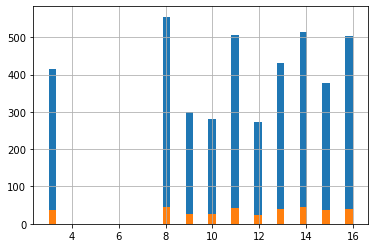

In [48]:
elaborated_data['emodb']['df']["actor"].hist(bins=40), frames['emodb']['actor'].hist(bins=40)

(<AxesSubplot: >, <AxesSubplot: >)

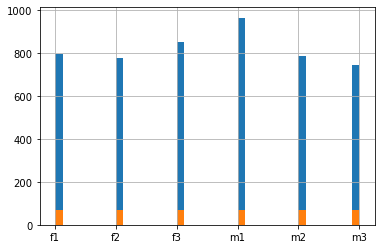

In [49]:
elaborated_data['emovo']['df']["actor"].hist(bins=40), frames['emovo']['actor'].hist(bins=40)

(<AxesSubplot: >, <AxesSubplot: >)

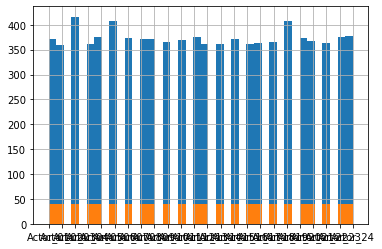

In [50]:
elaborated_data['ravdess']['df']["actor"].hist(bins=40), frames['ravdess']['actor'].hist(bins=40)

## Labels distribution

(<AxesSubplot: >, <AxesSubplot: >)

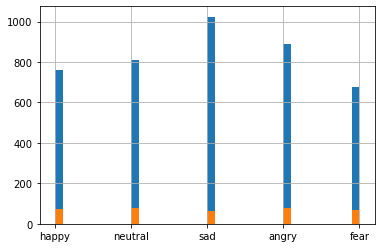

In [51]:
elaborated_data['emodb']['df']["label"].hist(bins=40), frames['emodb']["label"].hist(bins=40)

(<AxesSubplot: >, <AxesSubplot: >)

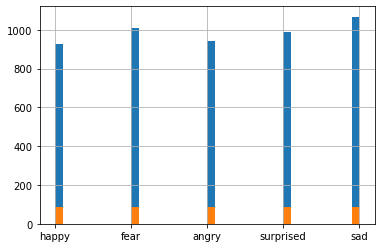

In [52]:
elaborated_data['emovo']['df']["label"].hist(bins=40), frames['emovo']["label"].hist(bins=40)

(<AxesSubplot: >, <AxesSubplot: >)

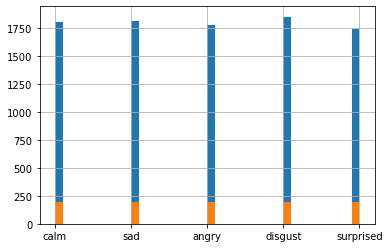

In [53]:
elaborated_data['ravdess']['df']["label"].hist(bins=40), frames['ravdess']["label"].hist(bins=40)

# Clean memory

Free some space that will be no longer used

In [73]:
del frames
del dataset_samples

In [74]:
elaborated_data["emodb"].keys()

dict_keys(['sgram', 'audio', 'df', 'y'])

In [75]:
for f in elaborated_data:
    del elaborated_data[f]['audio']

In [76]:
import gc
gc.collect()

1482

# Prepare data for models

## Labels

One-hot encode the labels

In [54]:
from sklearn.preprocessing import OneHotEncoder


for dataset in elaborated_data:
    encoder = OneHotEncoder()
    df_label = elaborated_data[dataset]["df"]["label"]
    Y = encoder.fit_transform(np.array(df_label).reshape(-1,1)).toarray()
    elaborated_data[dataset]["y"] = Y

In [55]:
elaborated_data["emodb"]["y"], elaborated_data["emodb"]["y"].shape

(array([[0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]),
 (4156, 5))

## Features

Normalize log mel spectrogram features. Divice each cell by the sum of the matrix; in this way the sum of the spectrogram is 1

In [56]:
a = np.array([[1,2,3],[2,2,2],[3,3,1]])
a

array([[1, 2, 3],
       [2, 2, 2],
       [3, 3, 1]])

In [57]:
def normalize(sgram):
    s = sgram.sum()
    return sgram/s

In [58]:
normalize(a), normalize(a).sum()

(array([[0.05263158, 0.10526316, 0.15789474],
        [0.10526316, 0.10526316, 0.10526316],
        [0.15789474, 0.15789474, 0.05263158]]),
 1.0)

Reshape from numpy Height x Width to Width x Height x Depth as TimeDistributed want as first input times, which in our data is horizontal axis

In [60]:
elaborated_data["emovo"]["sgram"][0].shape

(128, 261)

In [62]:
elaborated_data["emovo"]["sgram"][0].transpose().shape

(261, 128)

In [69]:
np.expand_dims(elaborated_data["emovo"]["sgram"][0].transpose(), axis=2).shape

(261, 128, 1)

In [72]:
np.expand_dims(a, axis=2).shape, np.expand_dims(a, axis=2)

((3, 3, 1),
 array([[[1],
         [2],
         [3]],
 
        [[2],
         [2],
         [2]],
 
        [[3],
         [3],
         [1]]]))

In [77]:
for d in elaborated_data:
    print(f'Computing {d}')
    # normalize and reshape data
    elaborated_data[d]['x'] = np.array([np.expand_dims(normalize(s).transpose(), axis=2)
                                        for s in elaborated_data[d]['sgram']])

Computing emodb
Computing emovo


C:\Users\Nicolas Facchinetti\AppData\Local\Temp\ipykernel_9784\974971219.py:3: RuntimeWarning: invalid value encountered in divide
  return sgram/s


Computing ravdess


In [81]:
elaborated_data['emovo']['x'][0].sum(), elaborated_data['emovo']['x'][0].shape

(1.0, (261, 128, 1))

# Save data

Save data for future computations

In [82]:
import pickle

for dataset in elaborated_data:
    print(f'Dumping data for {dataset}')
    x = elaborated_data[dataset]["x"]
    y = elaborated_data[dataset]["y"]
    df = elaborated_data[dataset]["df"]
    
    # pickle.dump({'x':x, 'y':y}, open(f'/datasets/nicolas_facchinetti/processed_data/{dataset}/processed_data.p', "wb"))
    # df.to_csv(f"/datasets/nicolas_facchinetti/processed_data/{dataset}/metadata_multif.csv", index=False)
    
    pickle.dump({'x':x, 'y':y}, open(f'D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{dataset}/processed_data.p', "wb"))
    df.to_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//{dataset}/metadata_final.csv", index=False)

Dumping data for emodb
Dumping data for emovo
Dumping data for ravdess
